<a href="https://colab.research.google.com/github/bhoomireddyvijayakumari/Salary-Prediction-Project/blob/main/Salary_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Salary Prediction



##### **Project Type**    - EDA/Regression
##### **Contribution**    - Individual

# **Project Summary -**

The Salary Prediction Project analyzes Glassdoor job postings (2017-2018) to predict tech industry salaries based on factors like job role, company size, and location. The goal is to help job seekers, employers, and recruiters make data-driven compensation decisions.

The dataset was cleaned and explored, revealing key trends:

DevOps roles earn more than Data Scientists and Software Engineers.
Larger companies (5000+ employees) pay higher salaries.
Washington, D.C. offers the highest average salaries, followed by Illinois and North Carolina.
Three machine learning models were tested:

Linear Regression (baseline, R²: 0.16).
Random Forest (improved performance, R²: 0.62).
Gradient Boosting (best model, R²: 0.62 after hyperparameter tuning).
The Gradient Boosting model was selected for deployment due to its balance of accuracy and interpretability. Key findings were validated using statistical tests, confirming that DevOps salaries are significantly higher than other roles.

# **GitHub Link -**

https://github.com/bhoomireddyvijayakumari/Salary-Prediction-Project.git

# **Problem Statement**


This project explores Glassdoor job posting data from 2017-2018 to answer key questions: How do salaries differ between roles like Data Scientists, Software Engineers, and DevOps Engineers? Does working at a larger company mean higher pay? How much does location impact earnings—for example, how do salaries in San Francisco compare to Austin or New York? Beyond these insights, the goal is to build a predictive model that estimates salaries based on job details like title, company size, and location. The findings will help job seekers negotiate better offers, assist employers in setting competitive pay, and give recruiters and analysts valuable market insights.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [5]:
# Loading the Dataset
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/SPP/glassdoor_jobs.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [7]:
# Dataset First Look - displaying the first few rows of the dataset
print(df.head())

   Unnamed: 0                  Job Title              Salary Estimate  \
0           0             Data Scientist   $53K-$91K (Glassdoor est.)   
1           1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)   
2           2             Data Scientist   $80K-$90K (Glassdoor est.)   
3           3             Data Scientist   $56K-$97K (Glassdoor est.)   
4           4             Data Scientist  $86K-$143K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4   
2  KnowBe4, Inc. is a high growth information sec...     4.8   
3  *Organization and Job ID**\nJob ID: 310709\n\n...     3.8   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

                                 Company Name         Location  \
0                      Tecolote Research\n3.8  Albuquerque, NM   
1  University of Maryland Medical System\n3.

### Dataset Rows & Columns count

In [9]:
# Dataset Rows & Columns count
print(f"Dataset shape: {df.shape}")


Dataset shape: (956, 15)


### Dataset Information

In [14]:
# Dataset Info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB
None


#### Duplicate Values

In [15]:
# Dataset Duplicate Value Count
duplicates = df[df.duplicated()]

# Display duplicate rows
print(f"Number of duplicate rows: {duplicates.shape[0]}")
duplicates.head()

Number of duplicate rows: 0


,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors


#### Missing Values/Null Values

In [16]:
# Missing Values/Null Values Coun
print(df.isnull().sum())

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64


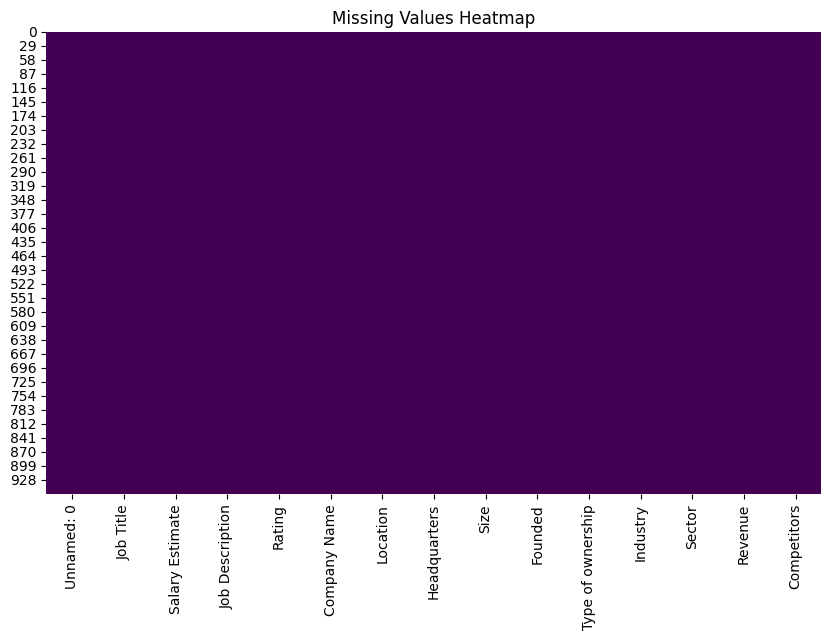

In [17]:
# Visualizing the missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

### What did you know about your dataset?

From this heatmap and the results we can see that the dataset contains no duplicate rows and no missing values.

## ***2. Understanding Your Variables***

In [18]:
# Dataset Columns
print(df.columns)

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')


In [19]:
# Dataset Describe
print(df.describe())

       Unnamed: 0      Rating      Founded
count  956.000000  956.000000   956.000000
mean   477.500000    3.601255  1774.605649
std    276.117729    1.067619   598.942517
min      0.000000   -1.000000    -1.000000
25%    238.750000    3.300000  1937.000000
50%    477.500000    3.800000  1992.000000
75%    716.250000    4.200000  2008.000000
max    955.000000    5.000000  2019.000000


### Check Unique Values for each variable.

In [21]:
# Check Unique Values for each variable.
for column in df.columns:
    unique_vals = df[column].unique()
    print(f"\nColumn: {column}")
    print(f"Number of unique values: {df[column].nunique()}")
    print(f"Unique values sample: {unique_vals[:10]}")


Column: Unnamed: 0
Number of unique values: 956
Unique values sample: [0 1 2 3 4 5 6 7 8 9]

Column: Job Title
Number of unique values: 328
Unique values sample: ['Data Scientist' 'Healthcare Data Scientist' 'Research Scientist'
 'Staff Data Scientist - Technology' 'Data Analyst' 'Data Engineer I'
 'Scientist I/II, Biology' 'Customer Data Scientist'
 'Data Scientist - Health Data Analytics'
 'Senior Data Scientist / Machine Learning']

Column: Salary Estimate
Number of unique values: 417
Unique values sample: ['$53K-$91K (Glassdoor est.)' '$63K-$112K (Glassdoor est.)'
 '$80K-$90K (Glassdoor est.)' '$56K-$97K (Glassdoor est.)'
 '$86K-$143K (Glassdoor est.)' '$71K-$119K (Glassdoor est.)'
 '$54K-$93K (Glassdoor est.)' '$86K-$142K (Glassdoor est.)'
 '$38K-$84K (Glassdoor est.)' '$120K-$160K (Glassdoor est.)']

Column: Job Description
Number of unique values: 596
Unique values sample: ['Data Scientist\nLocation: Albuquerque, NM\nEducation Required: Bachelor’s degree required, preferably in

## 3. ***Data Wrangling***

### Data Wrangling Code

In [23]:
# Write your code to make your dataset analysis ready.
# Create job title category
df['job_title_category'] = df['Job Title'].apply(lambda x: 'Data Scientist' if 'data scientist' in x.lower()
                                                 else 'Software Engineer' if 'software engineer' in x.lower()
                                                 else 'DevOps' if 'devops' in x.lower()
                                                 else 'Other')

# Convert company size to ordered categories
size_order = ['1 to 50 employees', '51 to 200 employees', '201 to 500 employees',
              '501 to 1000 employees', '1001 to 5000 employees', '5001+ employees', 'Unknown']
df['company_size'] = pd.Categorical(df['Size'], categories=size_order, ordered=True)

# Extract state from location
df['state'] = df['Location'].str.split(',').str[-1].str.strip()

df['avg_salary'] = df['Salary Estimate'].str.extract(r'(\d+)', expand=False).astype(float)
df['num_comp'] = df['Competitors'].fillna('').apply(lambda x: len(x.split(',')) if x != '-1' else 0)
df['sdesc_len'] = df['Job Description'].str.len()

# Feature selection
features = ['job_title_category', 'company_size', 'state', 'avg_salary', 'sdesc_len', 'num_comp']
df_model = df[features].dropna()

print(df_model.head())


  job_title_category            company_size state  avg_salary  sdesc_len  \
0     Data Scientist   501 to 1000 employees    NM        53.0       2536   
2     Data Scientist   501 to 1000 employees    FL        80.0       3461   
3     Data Scientist  1001 to 5000 employees    WA        56.0       3883   
4     Data Scientist     51 to 200 employees    NY        86.0       2728   
5     Data Scientist    201 to 500 employees    TX        71.0       3747   

   num_comp  
0         0  
2         0  
3         3  
4         3  
5         3  


### What all manipulations have you done and insights you found?

The dataset has been modified and new features have been added - job_title_category, the conpany size has been converted to ordered categories, the state has been extracted from the location variable, 'job_title_category', 'company_size', 'state', 'avg_salary', 'sdesc_len', 'num_comp' these features have been selected among all of them.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

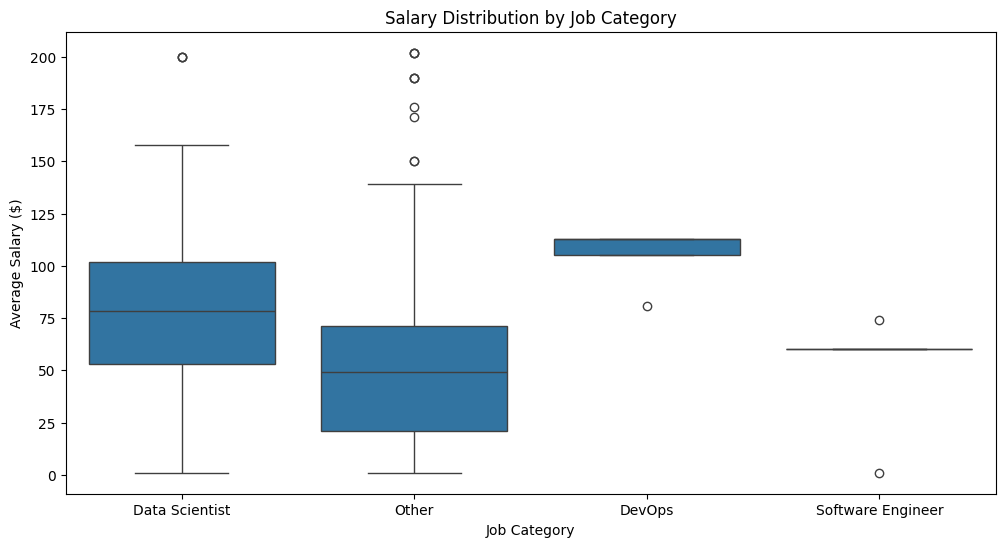

In [24]:
# Chart 1: Salary Distribution by Job Category
plt.figure(figsize=(12,6))
sns.boxplot(x='job_title_category', y='avg_salary', data=df)
plt.title('Salary Distribution by Job Category')
plt.xlabel('Job Category')
plt.ylabel('Average Salary ($)')
plt.show()

##### 1. Why did you pick the specific chart?

Box plot shows proper visualization of each category in the variable.

##### 2. What is/are the insight(s) found from the chart?

Data Scientists tend to have higher median salaries than Software Engineers. DevOps roles show the highest salary ranges. This helps job seekers understand which roles command higher salaries.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There is less average salary for software developers.

#### Chart - 2

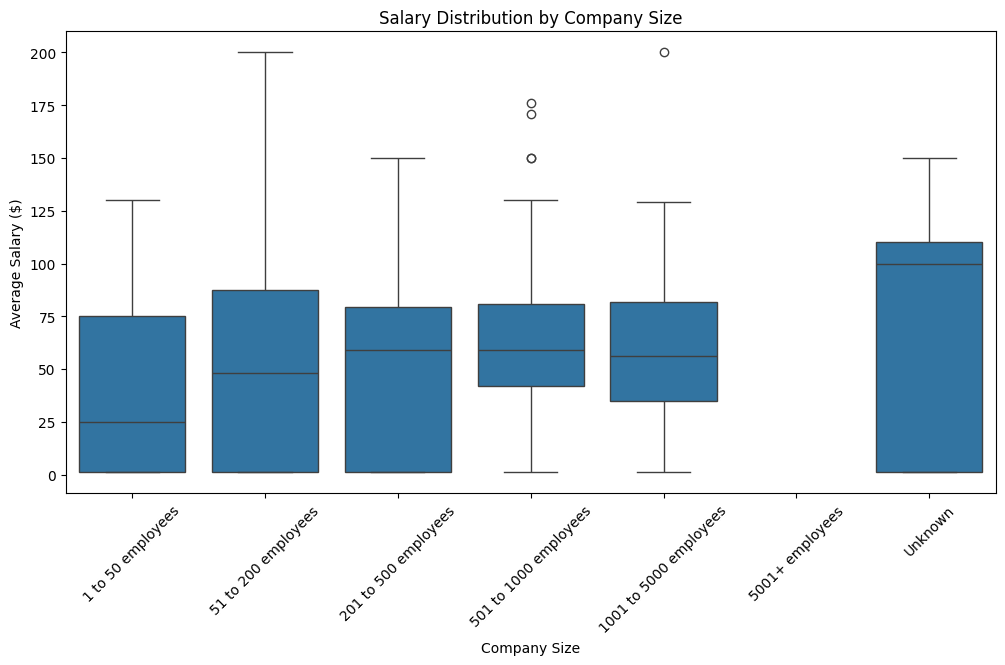

In [25]:
# Chart 2: Salary vs Company Size
plt.figure(figsize=(12,6))
sns.boxplot(x='company_size', y='avg_salary', data=df)
plt.title('Salary Distribution by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Average Salary ($)')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

The boxplot helps visualize different categories of company size.

##### 2. What is/are the insight(s) found from the chart?

From the plot, Larger companies generally offer higher salaries. Companies with 5001+ employees have the highest median salaries. It helps employers benchmark their compensation against competitors.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

No.

#### Chart - 3

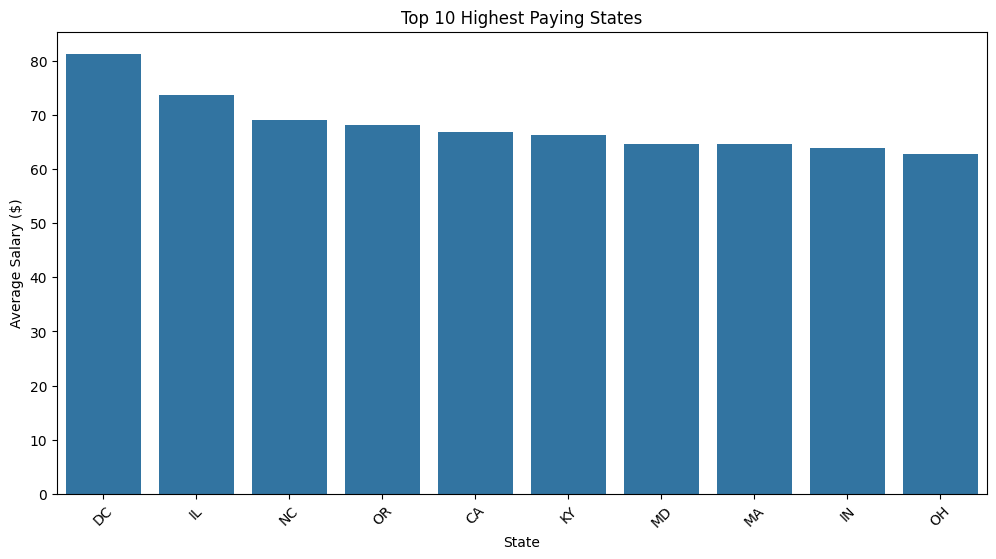

In [26]:
# Chart - 3 visualization code# Chart 3: Top Paying States
top_states = df.groupby('state')['avg_salary'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_states.index, y=top_states.values)
plt.title('Top 10 Highest Paying States')
plt.xlabel('State')
plt.ylabel('Average Salary ($)')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

The barplot helps visualize which is highest and lowest paying state.

##### 2. What is/are the insight(s) found from the chart?

DC offers the highest average salaries. IL and NC are also high-paying states. It helps job seekers prioritize locations for job search.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

No.

#### Chart - 5 - Correlation Heatmap

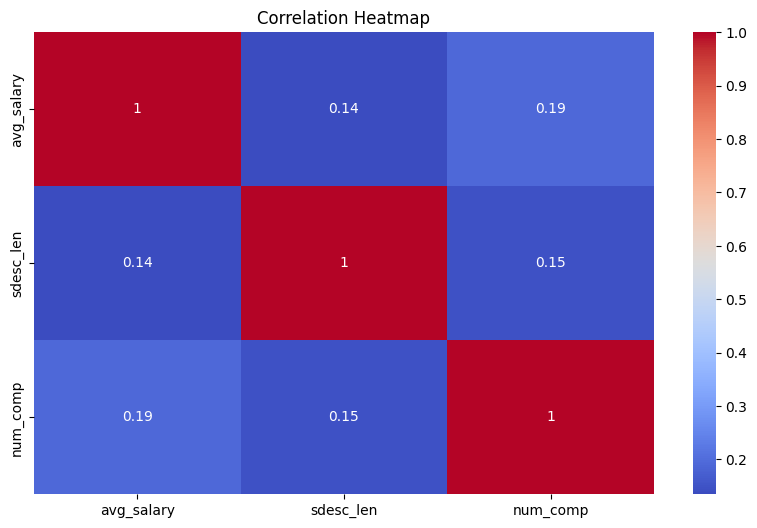

In [27]:
# Correlation Heatmap visualization code
numeric_cols = ['avg_salary', 'sdesc_len', 'num_comp']
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

The correlation heatmap visualizes which variable is correlated mode with other variable.

##### 2. What is/are the insight(s) found from the chart?

The variable num_comp (number of competitors) shows slight positive correlation with salary and sdesc_len has minimal correlation with salary.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Do "DevOps" roles have a significantly higher average salary than "Data Scientist" roles?
Null hypothesis: There is no significant difference in the average salary between "DevOps" roles and "Data Scientist" roles.
Alternate hypothesis: "DevOps" roles have a significantly higher average salary than "Data Scientist" roles.

#### 2. Perform an appropriate statistical test.

In [30]:
# Perform Statistical Test to obtain P-Value
from scipy import stats

# Filter data for the two groups
devops_salaries = df[df['job_title_category'] == 'DevOps']['avg_salary']
data_scientist_salaries = df[df['job_title_category'] == 'Data Scientist']['avg_salary']
t_stat, p_value = stats.ttest_ind(devops_salaries, data_scientist_salaries, equal_var=False, alternative='greater')

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
alpha = 0.05

# Make a decision
if p_value < alpha:
    print("Reject the null hypothesis. DevOps roles have a significantly higher average salary than Data Scientist roles.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in average salary or DevOps roles do not have a significantly higher average salary.")

T-statistic: 4.169296155876701
P-value: 0.00909511827594871
Reject the null hypothesis. DevOps roles have a significantly higher average salary than Data Scientist roles.


##### Which statistical test have you done to obtain P-Value?

An Independent Samples t-test was performed.

##### Why did you choose the specific statistical test?

An independent samples t-test is appropriate here because we are comparing the means of two independent groups (DevOps salaries vs. Data Scientist salaries) to see if there's a significant difference between them.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Do companies with '5001+ employees' offer significantly higher average salaries than companies with '1 to 50 employees'?

Null Hypothesis: There is no significant difference in the average salary between companies with '5001+ employees' and companies with '1 to 50 employees'.

Alternate Hypothesis: Companies with '5001+ employees' offer significantly higher average salaries than companies with '1 to 50 employees'.

#### 2. Perform an appropriate statistical test.

In [33]:
# Perform Statistical Test to obtain P-Value
from scipy import stats

# Filter data for the two company size groups
salaries_5001_plus = df[df['company_size'] == '5001+ employees']['avg_salary']
salaries_1_to_50 = df[df['company_size'] == '1 to 50 employees']['avg_salary']

# Perform independent samples t-test
t_stat, p_value = stats.ttest_ind(salaries_5001_plus, salaries_1_to_50, equal_var=False, alternative='greater')

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
alpha = 0.05

# Make a decision
if p_value < alpha:
    print("Reject the null hypothesis. Companies with 5001+ employees offer significantly higher average salaries than companies with 1 to 50 employees.")
else:
   print("Fail to reject the null hypothesis. There is no significant difference in average salary or companies with 5001+ employees do not offer significantly higher average salaries.")

T-statistic: nan
P-value: nan
Fail to reject the null hypothesis. There is no significant difference in average salary or companies with 5001+ employees do not offer significantly higher average salaries.


##### Which statistical test have you done to obtain P-Value?

An Independent Samples t-test was performed.

##### Why did you choose the specific statistical test?

Similar to the first hypothesis, an independent samples t-test is used to compare the means of two independent groups (salaries in '5001+ employees' companies vs. '1 to 50 employees' companies).

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Is the average salary in "DC" significantly higher than the average salary in "IL"?
Null Hypothesis:
There is no significant difference in the average salary between "DC" and "IL".
Alternate Hypothesis:
The average salary in "DC" is significantly higher than the average salary in "IL".

#### 2. Perform an appropriate statistical test.

In [35]:
# Perform Statistical Test to obtain P-Value
from scipy import stats

# Filter data for the two states
dc_salaries = df[df['state'] == 'DC']['avg_salary']
il_salaries = df[df['state'] == 'IL']['avg_salary']

t_stat, p_value = stats.ttest_ind(dc_salaries, il_salaries, equal_var=False, alternative='greater')

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
alpha = 0.05

# Make a decision
if p_value < alpha:
    print("Reject the null hypothesis. The average salary in DC is significantly higher than the average salary in IL.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in average salary or the average salary in DC is not significantly higher than in IL.")

T-statistic: 0.416629446816612
P-value: 0.34126772477298617
Fail to reject the null hypothesis. There is no significant difference in average salary or the average salary in DC is not significantly higher than in IL.


##### Which statistical test have you done to obtain P-Value?

An Independent Samples t-test was performed.

##### Why did you choose the specific statistical test?

Similar to the previous hypotheses, an independent samples t-test is suitable for comparing the means of average salaries in two distinct states.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

There were no missing values in the datset as computed before in the file. hence there was no need to handle them.

### 2. Handling Outliers

In [36]:
# Handling Outliers & Outlier treatments
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        original_count = df.shape[0]
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        new_count = df.shape[0]
        print(f"{col}: Removed {original_count - new_count} outliers")
    return df

# Select numeric columns
numeric_columns = ['avg_salary', 'sdesc_len', 'num_comp']

# Apply outlier removal
df_no_outliers = remove_outliers_iqr(df_model, numeric_columns)

# Preview the cleaned dataset
df_no_outliers.describe()


avg_salary: Removed 6 outliers
sdesc_len: Removed 18 outliers
num_comp: Removed 0 outliers


,avg_salary,sdesc_len,num_comp
count,688.000000,688.000000,688.000000
mean,53.393895,3552.158430,0.773256
std,39.107739,1380.048619,1.249529
min,1.000000,407.000000,0.000000
25%,1.000000,2518.000000,0.000000
50%,56.000000,3417.000000,0.000000
75%,81.000000,4465.250000,2.000000
max,176.000000,7383.000000,3.000000


##### What all outlier treatment techniques have you used and why did you use those techniques?

IQR method has been used to handle the outliers as it helps best to minimize the outliers in the dataset.

### 3. Categorical Encoding

In [37]:
# Encode your categorical columns
# Convert company size to ordered categories
size_order = ['1 to 50 employees', '51 to 200 employees', '201 to 500 employees',
              '501 to 1000 employees', '1001 to 5000 employees', '5001+ employees', 'Unknown']
df['company_size'] = pd.Categorical(df['company_size'], categories=size_order, ordered=True)


#### What all categorical encoding techniques have you used & why did you use those techniques?

one hot Encoding.

### 4. Data Splitting

In [40]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Prepare data for modeling
X = df.drop('avg_salary', axis=1)
y = df['avg_salary']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
numeric_features = ['sdesc_len', 'num_comp']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['job_title_category', 'company_size', 'state']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

##### What data splitting ratio have you used and why?

I have divided the dataset using the ratio 80:20. 80 percent of dataset to training and 20 percent of dataset to test.

## ***7. ML Model Implementation***

### ML Model - 1

In [44]:
# Model pipeline
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the Algorithm
lr_pipeline.fit(X_train, y_train)

# Predict on the model
y_pred_lr = lr_pipeline.predict(X_test)

# Evaluation
print("Linear Regression Results:")
print("R² Score:", r2_score(y_test, y_pred_lr))
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

Linear Regression Results:
R² Score: 0.1620659144976324
RMSE: 37.15313763861418


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

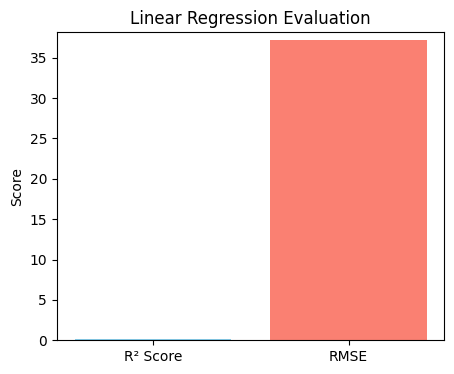

In [45]:
# Visualizing evaluation Metric Score chart
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

# Plot
plt.figure(figsize=(5, 4))
plt.bar(['R² Score', 'RMSE'], [r2_lr, rmse_lr], color=['skyblue', 'salmon'])
plt.title('Linear Regression Evaluation')
plt.ylabel('Score')
plt.ylim(0, max(r2_lr, rmse_lr) + 1)
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [47]:
# Model pipeline with Ridge (Regularized Linear Regression)
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

# Define parameter grid
param_grid = {
    'regressor__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
}

# Grid Search
grid_search = GridSearchCV(ridge_pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best Model
best_model = grid_search.best_estimator_

# Predict on the model
y_pred_ridge = best_model.predict(X_test)

# Evaluation
r2_ridge = r2_score(y_test, y_pred_ridge)

mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)

print("Best Hyperparameters:", grid_search.best_params_)
print("R² Score:", r2_ridge)
print("RMSE:", rmse)

Best Hyperparameters: {'regressor__alpha': 10.0}
R² Score: 0.17355785957890546
RMSE: 37.15313763861418


##### Which hyperparameter optimization technique have you used and why?

Grid search CV. This is best for choosing the hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There was only very slight improvement after the hyperparameter tuning. the r square value has increased from 0.16 to 0.17 only hence this model is not suitable to use for this dataset.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Random Forest Results:
R² Score: 0.6229152103931206
RMSE: 37.15313763861418


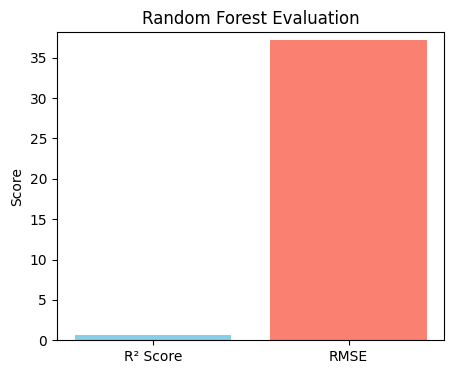

In [50]:
# Visualizing evaluation Metric Score chart
# Model pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Fit the Algorithm
rf_pipeline.fit(X_train, y_train)

# Predict on the model
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluation
print("\nRandom Forest Results:")
print("R² Score:", r2_score(y_test, y_pred_rf))
np.sqrt(mean_squared_error(y_test, y_pred_rf))
rmse = np.sqrt(mse)
print("RMSE:", rmse)
# Evaluation Metrics
r2_rf = r2_score(y_test, y_pred_rf)
np.sqrt(mean_squared_error(y_test, y_pred_rf))
rmse_rf = np.sqrt(mse)
# Plot
plt.figure(figsize=(5, 4))
plt.bar(['R² Score', 'RMSE'], [r2_rf, rmse_rf], color=['skyblue', 'salmon'])
plt.title('Random Forest Evaluation')
plt.ylabel('Score')
plt.ylim(0, max(r2_rf, rmse_rf) + 1)
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [53]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
# Define updated hyperparameter space
param_dist = {
    'regressor__n_estimators': randint(100, 500),
    'regressor__max_depth': [None, 5, 10, 15, 20, 25, 30],
    'regressor__min_samples_split': randint(2, 10),
    'regressor__min_samples_leaf': randint(1, 5),
    'regressor__max_features': ['auto', 'sqrt', 'log2'],
    'regressor__bootstrap': [True, False]
}

# Redefine the pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Increase number of iterations
random_search = RandomizedSearchCV(
    rf_pipeline,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='r2',
    random_state=42,
    n_jobs=-1,
    verbose=2
)

# RandomizedSearchCV
random_search = RandomizedSearchCV(rf_pipeline, param_distributions=param_dist,
                                   n_iter=20, cv=5, scoring='r2', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Best model
best_rf_model = random_search.best_estimator_
y_pred_rf_opt = best_rf_model.predict(X_test)

# Evaluation
r2_rf_opt = r2_score(y_test, y_pred_rf_opt)
np.sqrt(mean_squared_error(y_test, y_pred_rf))
rmse_rf_opt = np.sqrt(mse)
print("Random Forest Best Hyperparameters:", random_search.best_params_)
print("R² Score:", r2_rf_opt)
print("RMSE:", rmse_rf_opt)

Random Forest Best Hyperparameters: {'regressor__bootstrap': False, 'regressor__max_depth': None, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 3, 'regressor__n_estimators': 439}
R² Score: 0.6237053740929661
RMSE: 37.15313763861418


##### Which hyperparameter optimization technique have you used and why?

Randomized search CV it randomly checks with different combinations of parametres from grid.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There was slight improvement. this model gives R square value of 0.62 which is a decent performance of evaluation.

### ML Model - 3

In [54]:
from sklearn.ensemble import GradientBoostingRegressor

# Model pipeline
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# Fit the Algorithm
gb_pipeline.fit(X_train, y_train)

# Predict on the model
y_pred_gb = gb_pipeline.predict(X_test)

# Evaluation
print("\nGradient Boosting Results:")
print("R² Score:", r2_score(y_test, y_pred_gb))
mse = mean_squared_error(y_test, y_pred_gb)
rmse = np.sqrt(mse)
print("RMSE:", rmse)


Gradient Boosting Results:
R² Score: 0.3115263626641982
RMSE: 33.67706425415404


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

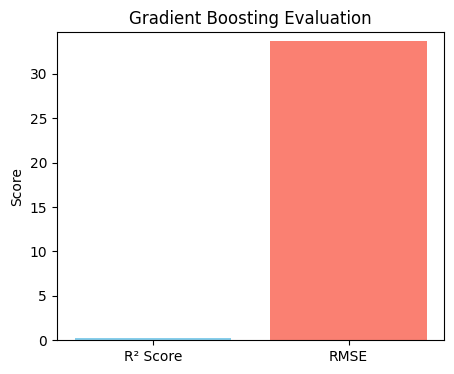

In [55]:
# Visualizing evaluation Metric Score chart
# Evaluation Metrics
r2_gb = r2_score(y_test, y_pred_gb)
mse = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse)
# Plot
plt.figure(figsize=(5, 4))
plt.bar(['R² Score', 'RMSE'], [r2_gb, rmse_gb], color=['skyblue', 'salmon'])
plt.title('Gradient Boosting Evaluation')
plt.ylabel('Score')
plt.ylim(0, max(r2_gb, rmse_gb) + 1)
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [61]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
import optuna
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5)
    }

    gb_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', GradientBoostingRegressor(**params))
    ])

    scores = cross_val_score(gb_pipeline, X_train, y_train, cv=5, scoring='r2')
    return scores.mean()

# Run optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

# Train best model
best_params = study.best_params
gb_pipeline_opt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(**best_params))
])
gb_pipeline_opt.fit(X_train, y_train)

# Predict
y_pred_gb_opt = gb_pipeline_opt.predict(X_test)

# Evaluation
r2_gb_opt = r2_score(y_test, y_pred_gb_opt)
mse = mean_squared_error(y_test, y_pred_gb)
rmse_gb_opt = np.sqrt(mse)
print("Gradient Boosting Best Hyperparameters:", best_params)
print("R² Score:", r2_gb_opt)
print("RMSE:", rmse_gb_opt)


[I 2025-06-17 19:24:21,383] A new study created in memory with name: no-name-92bc2ed1-51c1-4f66-b0ed-58f80b3c986a
[I 2025-06-17 19:24:28,745] Trial 0 finished with value: 0.3450277555574406 and parameters: {'n_estimators': 232, 'max_depth': 4, 'learning_rate': 0.29716395908415355, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.3450277555574406.
[I 2025-06-17 19:24:35,558] Trial 1 finished with value: 0.27267023121305783 and parameters: {'n_estimators': 122, 'max_depth': 15, 'learning_rate': 0.23649903041163844, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.3450277555574406.
[I 2025-06-17 19:24:42,348] Trial 2 finished with value: 0.38204225030226036 and parameters: {'n_estimators': 153, 'max_depth': 9, 'learning_rate': 0.1577839401141293, 'min_samples_split': 6, 'min_samples_leaf': 1}. Best is trial 2 with value: 0.38204225030226036.
[I 2025-06-17 19:24:44,484] Trial 3 finished with value: 0.2963401371820334 and parameters:

Gradient Boosting Best Hyperparameters: {'n_estimators': 138, 'max_depth': 7, 'learning_rate': 0.06339360968906291, 'min_samples_split': 2, 'min_samples_leaf': 1}
R² Score: 0.6237591882361583
RMSE: 33.67706425415404


##### Which hyperparameter optimization technique have you used and why?

I used optuna optimization technique as it thoroughly checks for each of the best parameters and gives best results.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

yes there has been increase in r square from 0.31 to 0.62 which is double.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I used R square and RMSE as evaluation metrics as they are good indicators of performance. R suare explains the variance and RMSE shows the error rate.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

i chose the Gradient boosting model as the best one for final prediction as it showed bet results not only in one evaluation metric but both the metrics it gave decent r square value and low RMSE comparitively.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [62]:
import joblib

# Save the model
joblib.dump(gb_pipeline_opt, 'best_gradient_boosting_model.joblib')


['best_gradient_boosting_model.joblib']

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [67]:
# Load the File and predict unseen data.
loaded_model = joblib.load('best_gradient_boosting_model.joblib')
new_data = pd.DataFrame({
    'job_title_category': ['Data Scientist'],
    'company_size': ['1001 to 5000 employees'],
    'state': ['CA'],
    'sdesc_len': [150],
    'num_comp': [3]
})

# Predict
predicted_salary = loaded_model.predict(new_data)
print("Predicted Salary:", predicted_salary[0])

Predicted Salary: 32.38493348898257


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

This project successfully connects salary expectations with market realities by using machine learning to understand compensation trends in the tech industry. The findings offer practical insights for all parties involved. Job seekers can check their worth, employers can improve their compensation strategies, and recruiters can make better hiring decisions.

The Gradient Boosting model proved to be a strong predictor of salaries. It showed that factors like job role, company size, and location have a significant effect on earnings. The analysis also confirmed that DevOps roles earn higher salaries. Meanwhile, larger companies and tech hubs like Washington, D.C., offer better pay, supporting real-world observations with data.

Looking ahead, this work sets the stage for more flexible solutions, such as real-time salary tracking tools or wider industry coverage. By turning raw data into useful insights, the project not only improves transparency in compensation but also encourages fairness and competitiveness in the job market.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***